<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_11_28_%EC%84%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. 데이터 불러오기**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### **2. 데이터 전처리**

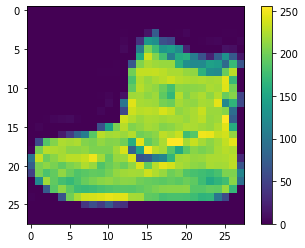

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

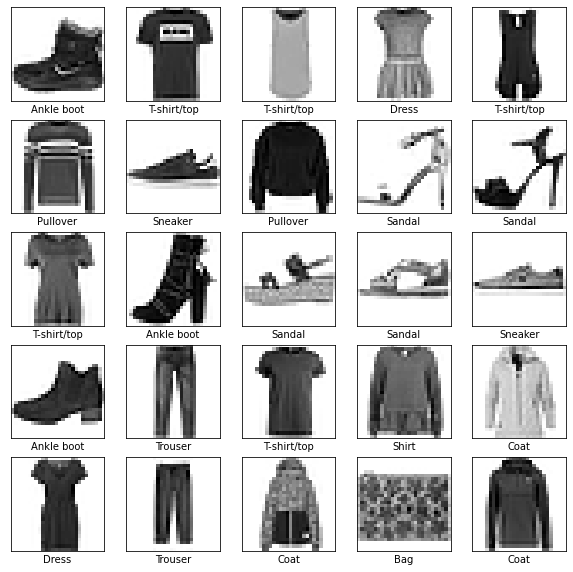

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### **3. 모델 구성**

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4976 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3372 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3133 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2916 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2772 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2640 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2551 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

In [13]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy: ',test_acc)

313/313 - 1s - loss: 0.3241 - accuracy: 0.8856 - 647ms/epoch - 2ms/step

Test accuracy:  0.8855999708175659


In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [17]:
predictions[0]

array([1.2023111e-07, 1.4940928e-09, 1.1637668e-06, 6.1895600e-09,
       6.5594610e-09, 9.2697213e-04, 2.5134375e-07, 6.3156071e-03,
       2.1843674e-08, 9.9275577e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]


9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

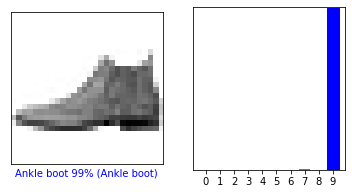

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

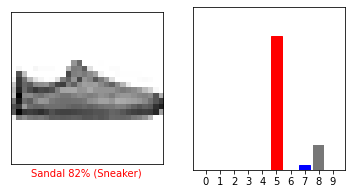

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

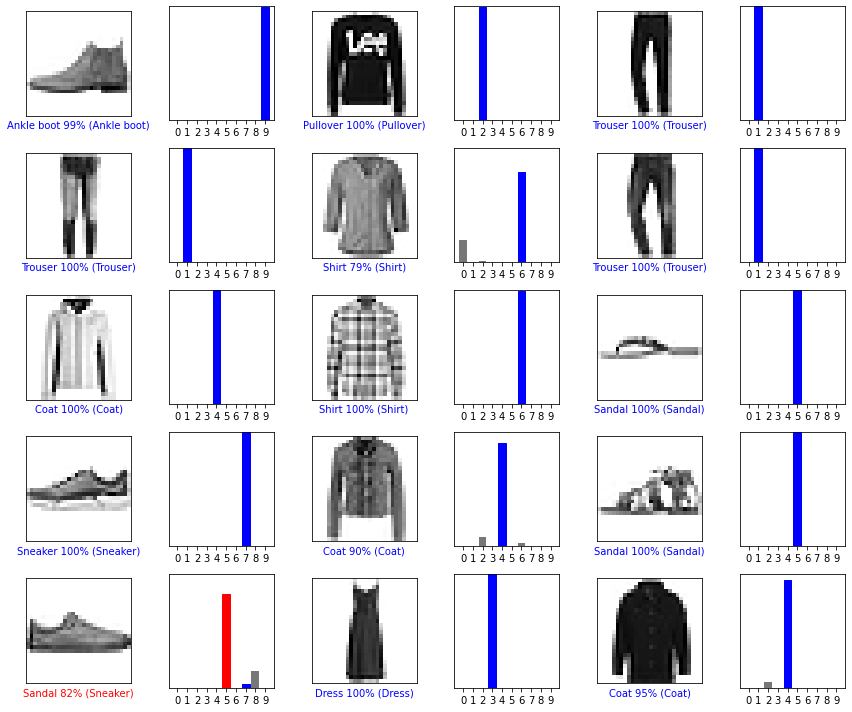

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### **4. 훈련된 모델 사용하기**

In [24]:
img = test_images[1]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 34ms/step
[[4.43541285e-05 6.18274958e-17 9.98778284e-01 1.90871693e-11
  2.69678858e-04 8.02497609e-17 9.07566340e-04 8.09476591e-14
  2.23477140e-10 1.04825116e-11]]


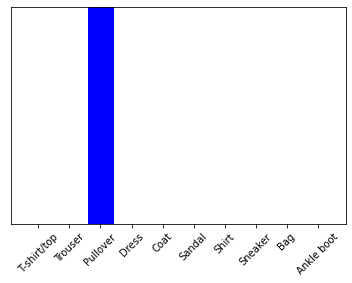

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2